# Merck Assignment For Submission

In [1]:
# Importing all Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile('D:\Merck\Merck_Use_Case.xlsx')
df = pd.read_excel(xls, 'Case study DS')
df.head()

,GIP Region,Region Desc,Sales Organization,Sales Organisation Desc,Dmd - Global Region,Demand Group,Global Material,Material Desc,PMAN ABC Code,PEAM ABC Code,...,GPP Division,Division Desc,GPP Portfolio,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV,2021 Forecast-Qty,2021 Forecast -GSV,2022 Forecast-Qty,2022 Forecast -GSV
0,USA,USA,0020,US,USA,AMAZON,BDA42SD,42PC SCREWDRIVING SET,C,C,...,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,40468.0,219741.24,41508.0,225389.53,78336,425363.21
1,USA,USA,0020,US,USA,AMAZON,15557,10 PC DRILL BIT SET,D,D,...,34,COMMERCIAL ACCESSORI,47110,ROUND SHANK METAL DR,-1407.0,-4643.10,NaN,NaN,-,-
2,USA,USA,0020,US,USA,RGMASS,BDA42SD,42PC SCREWDRIVING SET,C,C,...,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,1305.0,7660.35,536.0,3147.09,225,1320.14
3,USA,USA,0020,US,USA,ACE,BDA46SDDD,46PC SCREWDRIVING / DRILL,C,C,...,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,780.0,9516.00,471.0,5623.91,645,7710.36
4,USA,USA,0020,US,USA,RW,BDA42SD,42PC SCREWDRIVING SET,C,C,...,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,NaN,NaN,292.0,1783.55,413,2517.28


Basic Data Exploration

In [3]:
df.shape

(19449, 29)

In [4]:
df.columns

Index(['GIP Region', 'Region Desc', 'Sales Organization',
       'Sales Organisation Desc', 'Dmd - Global Region', 'Demand Group',
       'Global Material', 'Material Desc', 'PMAN ABC Code', 'PEAM ABC Code',
       'PEAM Code', 'GPP SBU', 'SBU Desc', 'GLB Source of Supply', 'SOS Desc',
       'GLB Preferred Vendor', 'Vendor Desc', 'GPP Category', 'Category Desc',
       'GPP Division', 'Division Desc', 'GPP Portfolio', 'Portfolio Desc',
       '2020 Shipment -Qty', '2020 Shipment -GSV', '2021 Forecast-Qty',
       '2021 Forecast -GSV', '2022 Forecast-Qty', '2022 Forecast -GSV'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19449 entries, 0 to 19448
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GIP Region               19449 non-null  object 
 1   Region Desc              19449 non-null  object 
 2   Sales Organization       19449 non-null  object 
 3   Sales Organisation Desc  19449 non-null  object 
 4   Dmd - Global Region      19449 non-null  object 
 5   Demand Group             19449 non-null  object 
 6   Global Material          19449 non-null  object 
 7   Material Desc            19449 non-null  object 
 8   PMAN ABC Code            19449 non-null  object 
 9   PEAM ABC Code            19449 non-null  object 
 10  PEAM Code                19449 non-null  object 
 11  GPP SBU                  19449 non-null  object 
 12  SBU Desc                 19449 non-null  object 
 13  GLB Source of Supply     19449 non-null  object 
 14  SOS Desc              

In [6]:
df.describe()

,GPP Division,2020 Shipment -Qty,2020 Shipment -GSV,2021 Forecast-Qty,2021 Forecast -GSV
count,19449.000000,14531.000000,1.453100e+04,12858.000000,1.285800e+04
mean,15.158363,1399.806070,4.093977e+04,1980.339011,6.291921e+04
std,8.415611,11077.449299,2.702942e+05,10571.844071,3.345213e+05
min,1.000000,-1407.000000,-2.845045e+04,-871.000000,-4.268074e+04
25%,10.000000,17.000000,3.331850e+02,29.000000,5.431600e+02
50%,10.000000,120.000000,2.646580e+03,200.000000,4.373020e+03
75%,18.000000,604.000000,1.716115e+04,986.000000,2.772273e+04
max,70.000000,818900.000000,1.659529e+07,386715.000000,1.458730e+07


# 1. Data LookOut for Quality Checks

a. Checking defects in data & Performing necessary actions to fix the defects

Asseumption : As I have no idea how 2021 & 2022 Forecasted Values are caluclated, I won't be considering them into analysis

In [7]:
df1 = df.copy()
df1 = df1.drop(columns= ['2021 Forecast-Qty',
'2021 Forecast -GSV',
'2022 Forecast-Qty',
'2022 Forecast -GSV'],axis =1)
df1.head()

,GIP Region,Region Desc,Sales Organization,Sales Organisation Desc,Dmd - Global Region,Demand Group,Global Material,Material Desc,PMAN ABC Code,PEAM ABC Code,...,GLB Preferred Vendor,Vendor Desc,GPP Category,Category Desc,GPP Division,Division Desc,GPP Portfolio,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV
0,USA,USA,0020,US,USA,AMAZON,BDA42SD,42PC SCREWDRIVING SET,C,C,...,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,40468.0,219741.24
1,USA,USA,0020,US,USA,AMAZON,15557,10 PC DRILL BIT SET,D,D,...,NO_SOURCE,NO_SOURCE,404,METAL DRILLING,34,COMMERCIAL ACCESSORI,47110,ROUND SHANK METAL DR,-1407.0,-4643.10
2,USA,USA,0020,US,USA,RGMASS,BDA42SD,42PC SCREWDRIVING SET,C,C,...,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,1305.0,7660.35
3,USA,USA,0020,US,USA,ACE,BDA46SDDD,46PC SCREWDRIVING / DRILL,C,C,...,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,780.0,9516.00
4,USA,USA,0020,US,USA,RW,BDA42SD,42PC SCREWDRIVING SET,C,C,...,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,NaN,NaN


In [8]:
df1.columns

Index(['GIP Region', 'Region Desc', 'Sales Organization',
       'Sales Organisation Desc', 'Dmd - Global Region', 'Demand Group',
       'Global Material', 'Material Desc', 'PMAN ABC Code', 'PEAM ABC Code',
       'PEAM Code', 'GPP SBU', 'SBU Desc', 'GLB Source of Supply', 'SOS Desc',
       'GLB Preferred Vendor', 'Vendor Desc', 'GPP Category', 'Category Desc',
       'GPP Division', 'Division Desc', 'GPP Portfolio', 'Portfolio Desc',
       '2020 Shipment -Qty', '2020 Shipment -GSV'],
      dtype='object')

In [9]:
# Separating Continuous, categorical from 'df1' Dataframe

cat_col=list(df1.select_dtypes('object').columns)
con_col=list(df1.select_dtypes('number').columns)
con_col.remove('2020 Shipment -GSV')

Performing Null Value & Sparsity Analysis

In [10]:
# Finding the % of Null Values

df_null = df1.isnull().sum()/len(df1) * 100
null_col = df_null[df_null>0]
null_col

2020 Shipment -Qty    25.286647
2020 Shipment -GSV    25.286647
dtype: float64

The Dataset consists no Null values in relevant columns except in Last two columns. On looking into dataset, I believe they are pretty much important for Sales Analysis or Future Sales Forecasting; hence I won't be dropping the rows with Null/Missing values.

Approximately 25% of relevant data is missing from our dataset; where 

Qty can be imputed with 'Mode' & 

GSV can be imputed with 'Mean' during Modelling.

In [11]:
sparr = df1.apply(pd.arrays.SparseArray)
print(1-sparr.sparse.density)

0.020229317702709526


Sparsity = (Total No. of Elements - Number of Non Zero Elements)/(Total No. of Elements)

It is evident that the dataframe is 97.9% dense i.e., 97.9% of its cells are populated with non-zero values. In order words, our dataframe for analysis is 2% sparse meaning that 2% of its cells are either not filled or are zeroes.

# Based upon Demand from Different Regions, answering the following questions:

Assumption: Assuming Dataset contains all entries/ material exported in the year 2020

a. Top 3 global regions which orders the most ?

In [12]:
df1['Dmd - Global Region'].value_counts()

EANZ            5181
LAG             4430
USA             3799
EMG             3203
ASIA            1765
CDN              914
Not assigned     157
Name: Dmd - Global Region, dtype: int64

<AxesSubplot:xlabel='Dmd - Global Region', ylabel='count'>

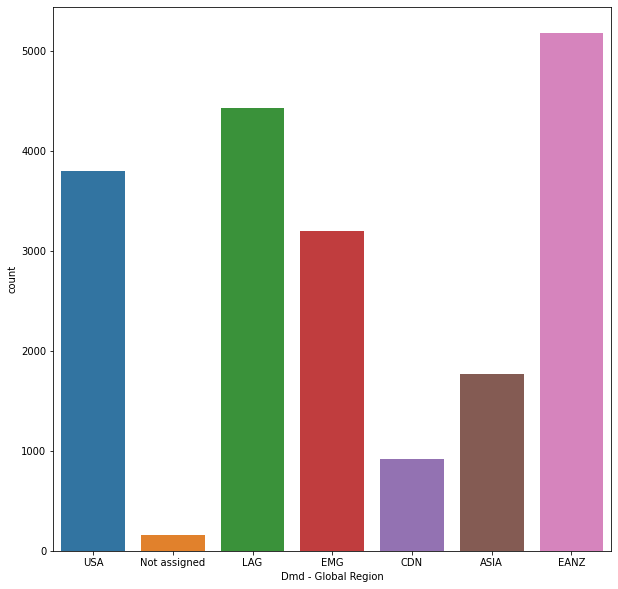

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df1, x='Dmd - Global Region')


EANZ i.e., Europe & Australia & New Zealand region collectively demand for most(= 5181) materials from different vendors.

LAG - Latin America being second &

USA being the third

b. Top Demand Group Globally Based on 2020 GSV?

In [13]:
df1['Demand Group'].value_counts()

NAPTOTHER    523
AMAZON       419
MENA-MC      379
INOTHER      348
FR-DIY       345
            ... 
CDNOTHER       1
JPNW           1
MACTOOL        1
CDNTIREEC      1
MTDIST         1
Name: Demand Group, Length: 189, dtype: int64

In [14]:
df2= df1.groupby('Demand Group')['2020 Shipment -GSV'].sum()
df2=pd.DataFrame(df2)
df2.reset_index(level=0, inplace=True)
df2.sort_values(by='2020 Shipment -GSV', ascending=False, inplace=True)
df2 = df2.head()

<AxesSubplot:xlabel='Demand Group'>

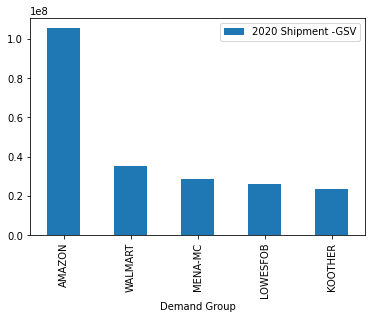

In [15]:
df2.plot.bar(x='Demand Group',y='2020 Shipment -GSV')

Based Upon Gross Sales Value, Following Demand Groups are prime customers to the company:

1.) Amazon

2.) Walmart

3.) Mena-MC

4.) Lowesfob

5.)Koother

c. Top Material Export Globally Based on 2020 GSV i.e., Top 5 Most Demanded Materials by Demand Groups?

In [16]:
df1['Material Desc'].nunique()

2618

In [17]:
df1['Material Desc'].value_counts()

BLACKDECKER WORKMATE - WM    146
36V 2.0Ah Floor Extension     69
18v 2.0Ah Floor Extension     65
45Wh Li-ion Cordless Upri     63
JOGO FURAR/PARAFUSAR C/       62
                            ... 
10L - 1200W WET  DRY CLEA      1
WORKMATE Portable Project      1
HD FILTER FOR DVC320B          1
18V MPP STICK FLOOR EXTEN      1
8L COOLER  WARMER 12V          1
Name: Material Desc, Length: 2618, dtype: int64

In [18]:
df3= df1.groupby('Material Desc')['2020 Shipment -GSV'].sum()
df3=pd.DataFrame(df3)
df3.reset_index(level=0, inplace=True)
df3.sort_values(by='2020 Shipment -GSV', ascending=False, inplace=True)
df3.reset_index(inplace = True)
df3 = df3.head()

<AxesSubplot:xlabel='Material Desc'>

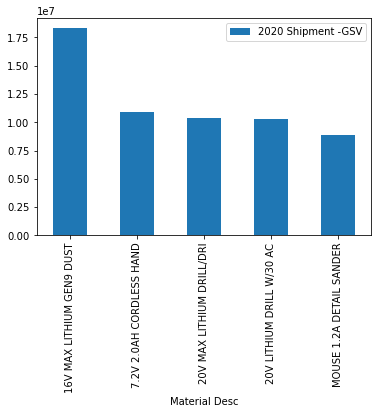

In [19]:
df3.plot.bar(x='Material Desc',y='2020 Shipment -GSV')

In [20]:
df3.head()

,index,Material Desc,2020 Shipment -GSV
0,480,16V MAX LITHIUM GEN9 DUST,18318299.24
1,1467,7.2V 2.0AH CORDLESS HAND,10894414.44
2,868,20V MAX LITHIUM DRILL/DRI,10381945.06
3,842,20V LITHIUM DRILL W/30 AC,10252468.86
4,2204,MOUSE 1.2A DETAIL SANDER,8837047.95


The Materials which provide maximum Gross Sales on their export are the following :

1.) 16V MAX LITHIUM GEN9 DUST

2.) 7.2V 2.0AH CORDLESS HAND	

3.) 20V MAX LITHIUM DRILL/DRI	

4.) 20V LITHIUM DRILL W/30 AC	

5.) MOUSE 1.2A DETAIL SANDER

d. Top Themes/GPP SBU Exported in the year of 2020?

This Question will help us to identify which sector has been demanding in the year of 2020 & can be used in future sales forecast analysis

In [21]:
df1['SBU Desc'].unique()

array(['CONSTRUCTION SOLUTIO', 'INDUSTRIAL SOLUTIONS',
       'HOME PRODUCTS GROUP', 'CONS POWER TOOLS', 'AUTOMOTIVE & INDUSTR',
       'PROF POWER TOOLS', 'ANCHORS & FIXINGS', 'PRODUCT SERVICE DIVI'],
      dtype=object)

In [22]:
df1['SBU Desc'].value_counts()

CONS POWER TOOLS        9223
HOME PRODUCTS GROUP     5498
CONSTRUCTION SOLUTIO    2922
INDUSTRIAL SOLUTIONS    1057
AUTOMOTIVE & INDUSTR     673
PROF POWER TOOLS          74
ANCHORS & FIXINGS          1
PRODUCT SERVICE DIVI       1
Name: SBU Desc, dtype: int64

<AxesSubplot:xlabel='SBU Desc', ylabel='count'>

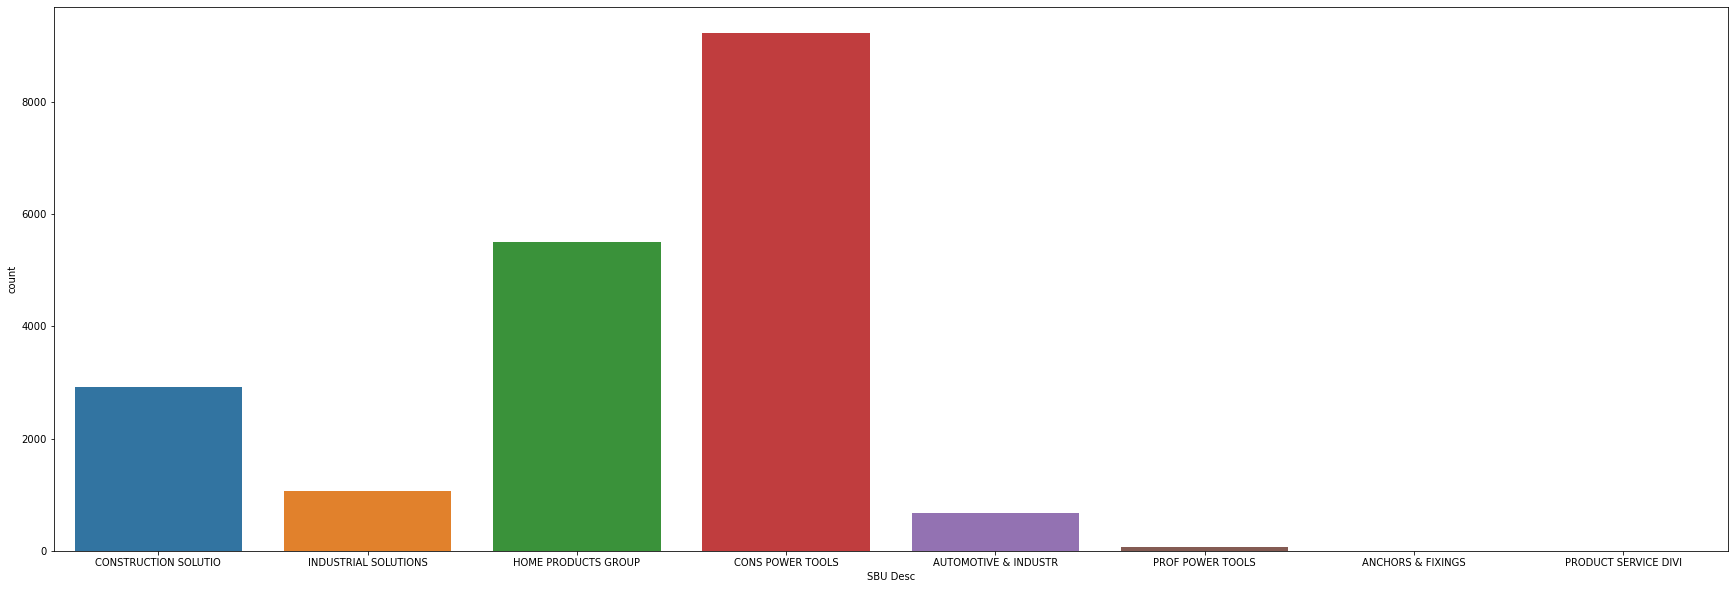

In [23]:
plt.figure(figsize=(30,10))
sns.countplot(data=df1, x='SBU Desc')

<AxesSubplot:xlabel='SBU Desc'>

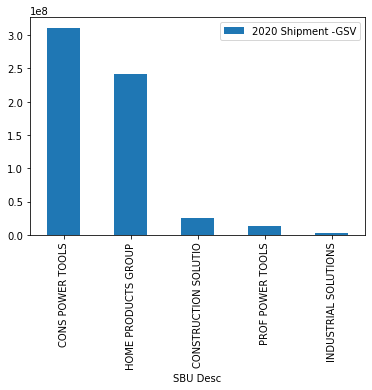

In [24]:
df4= df1.groupby('SBU Desc')['2020 Shipment -GSV'].sum()
df4=pd.DataFrame(df4)
df4.reset_index(level=0, inplace=True)
df4.sort_values(by='2020 Shipment -GSV', ascending=False, inplace=True)
df4.reset_index(inplace = True)
df4 = df4.head()
df4.plot.bar(x= "SBU Desc", y='2020 Shipment -GSV')

Top 3 SBU/Themes are common in both Frequency & Sales plot i.e,

1.) Construction Power Tools

2.) Home Products Group &,

3.) Construction Solutions

But it is quite evident that even though Frequency of Professional Power Tools is lesser than Industrial Solutions, it provides more business to the company than the latter. It means that 'Professional power tools' products are costlier than 'Industrial Solutions' SBU.

e. Preferred Vendor i.e., vendors who provide most of exports Based Upon Top Demand Groups?

Such insights can help companies to strengthen their supply chain from vendor to client end.

In [25]:
cond = (df1['Demand Group']=='AMAZON') | (df1['Demand Group']=='WALMART') | (df1['Demand Group']=='MENA-MC') | (df1['Demand Group']=='LOWESFOB') | (df1['Demand Group']=='KOOTHER')
updated_df = df1[cond].reset_index().drop(['index'],axis=1)

In [26]:
updated_df.head()

,GIP Region,Region Desc,Sales Organization,Sales Organisation Desc,Dmd - Global Region,Demand Group,Global Material,Material Desc,PMAN ABC Code,PEAM ABC Code,...,GLB Preferred Vendor,Vendor Desc,GPP Category,Category Desc,GPP Division,Division Desc,GPP Portfolio,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV
0,USA,USA,0020,US,USA,AMAZON,BDA42SD,42PC SCREWDRIVING SET,C,C,...,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,40468.0,219741.24
1,USA,USA,0020,US,USA,AMAZON,15557,10 PC DRILL BIT SET,D,D,...,NO_SOURCE,NO_SOURCE,404,METAL DRILLING,34,COMMERCIAL ACCESSORI,47110,ROUND SHANK METAL DR,-1407.0,-4643.10
2,USA,USA,0020,US,USA,AMAZON,BDA46SDDD,46PC SCREWDRIVING / DRILL,C,C,...,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,3252.0,27663.99
3,USA,USA,0020,US,USA,AMAZON,BDA32IRDD,32PC IMPACT READY SCREWDR,C,C,...,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,533.0,6060.21
4,USA,USA,0020,US,USA,WALMART,BDEMS600VA,WMT BDEMS600 VA,C,C,...,954,SUZHOU CPT,255,CORDED SANDERS,10,CONSUMER (CPT),42830,DETAIL SANDER,-152.0,-4492.82


In [27]:
df5 = updated_df.groupby(['Demand Group','Vendor Desc'])['2020 Shipment -GSV'].sum().reset_index()


In [28]:
dg = updated_df['Demand Group'].unique()

In [29]:
for i in dg:
    df6 = df5[df5['Demand Group']==i].sort_values(by='2020 Shipment -GSV',ascending=False).reset_index(drop=True)[:3]
    print('-'*100)
    print('Demand Group :',i)
    print('-'*100)
    print(df6)

----------------------------------------------------------------------------------------------------
Demand Group : AMAZON
----------------------------------------------------------------------------------------------------
  Demand Group Vendor Desc  2020 Shipment -GSV
0       AMAZON  SUZHOU CPT         94947676.36
1       AMAZON    MULTIPLE          5769230.61
2       AMAZON  VRONGSHENG          1233789.94
----------------------------------------------------------------------------------------------------
Demand Group : WALMART
----------------------------------------------------------------------------------------------------
  Demand Group           Vendor Desc  2020 Shipment -GSV
0      WALMART            SUZHOU CPT         34931927.37
1      WALMART             NO_SOURCE           198782.55
2      WALMART  GUANG DONG XINBAO EL                0.00
----------------------------------------------------------------------------------------------------
Demand Group : LOWESFOB
----------

SUZHOU CPT Vendor is Preferred By most of the Demand Group & is present in their top 3 suppliers. Supply Chain Improvements should be done so that both vendor & client can make more business.

f. Which categories are sold the most?

<AxesSubplot:xlabel='Category Desc'>

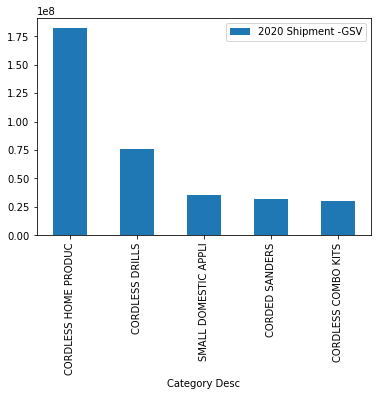

In [30]:
df7= df1.groupby('Category Desc')['2020 Shipment -GSV'].sum()
df7=pd.DataFrame(df7)
df7.reset_index(level=0, inplace=True)
df7.sort_values(by='2020 Shipment -GSV', ascending=False, inplace=True)
df7.reset_index(inplace = True)
df7 = df7.head()
df7.plot.bar(x= "Category Desc", y='2020 Shipment -GSV')

Cordless Appliances/Categories are Sold More than Corded Appliances. The above Bar Plot Provides Top 5 Categories which were sold the most in 2020.

g. Top Quantities of Materials Sold in Export orders?

In [31]:
df8= df1.groupby(['Material Desc','SBU Desc'])['2020 Shipment -Qty'].sum()
df8=pd.DataFrame(df8)
df8.reset_index(level=0, inplace=True)
df8.sort_values(by='2020 Shipment -Qty', ascending=False, inplace=True)
df8.reset_index(inplace = True)
df8 = df8.head()

<AxesSubplot:xlabel='2020 Shipment -Qty', ylabel='Material Desc'>

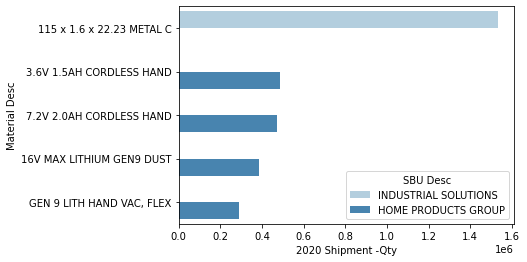

In [32]:

sns.barplot(data=df8, y= 'Material Desc', x='2020 Shipment -Qty', hue='SBU Desc',palette='Blues',orient='h')

Even though Construction Power Tool provide most Sales Value, But Industrial Solutions SBU sells a material whose quantity is sold the most. Other products are form HPG SBU.

h. Based upon Regions, What SBU products are exported the most?

<AxesSubplot:xlabel='2020 Shipment -Qty', ylabel='Dmd - Global Region'>

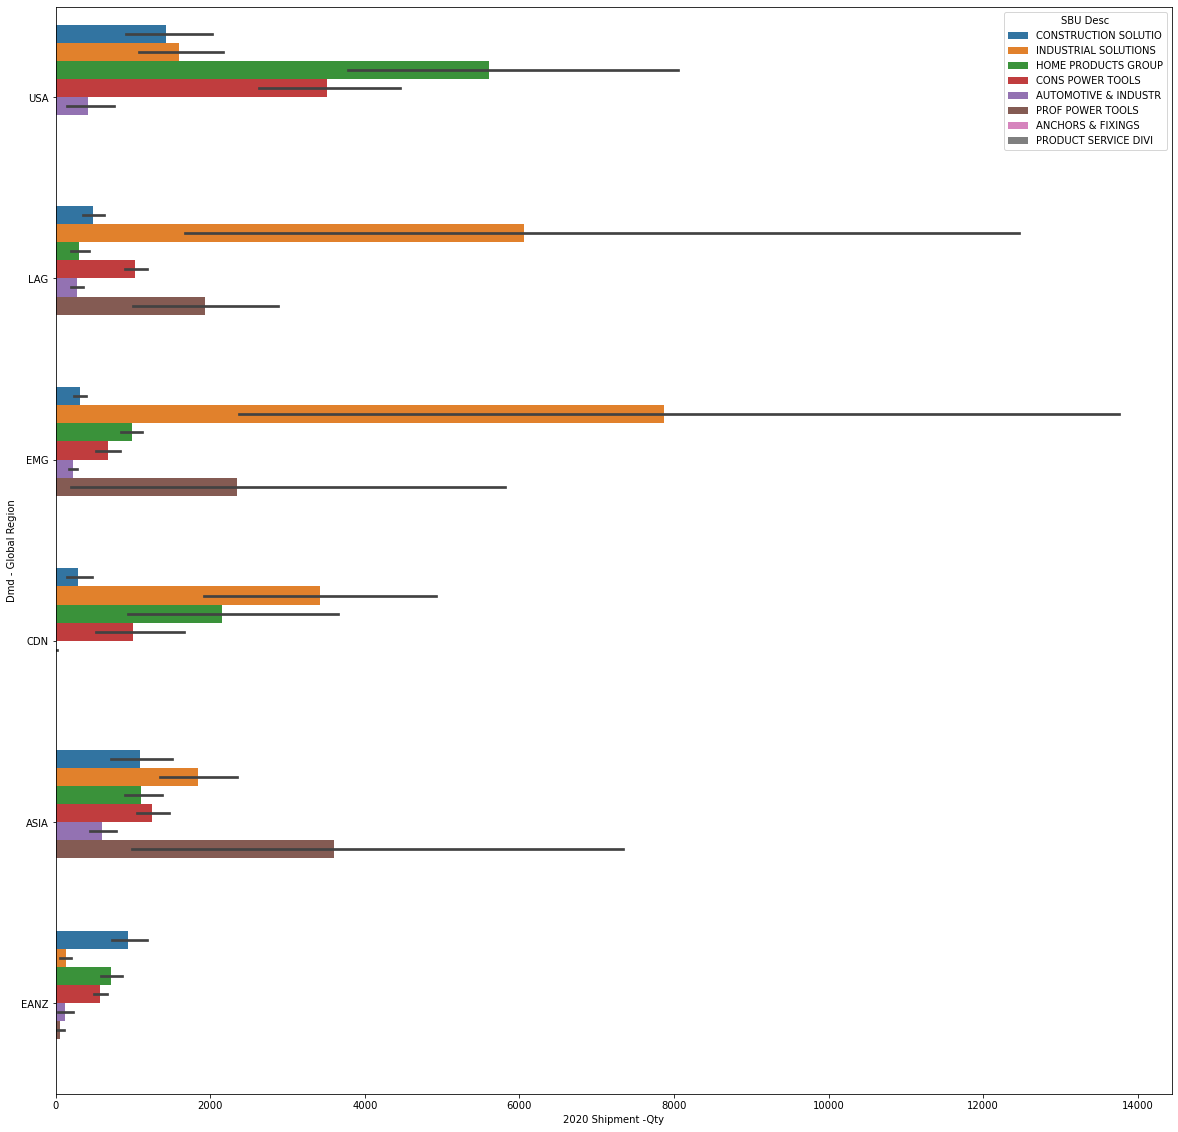

In [64]:

plt.figure(figsize=(20,20))
df_SBU = df1[df1['Dmd - Global Region'] != 'Not assigned']
sns.barplot(data=df_SBU, y= 'Dmd - Global Region', x='2020 Shipment -Qty', hue='SBU Desc',orient='h')

From the above graph,
Different categories for Different Demand Regions can be obtained.

# Moving one level inside, & FInding Results Based upon Regions

In [36]:
df9 = df1[df1['Dmd - Global Region'] != 'Not assigned']
df9.shape

(19292, 25)

a. Finding Out Top Demand Groups in Each Region?

This information can provide us potential competition in Demand Group Market

In [37]:
df10 = df9.groupby(['Dmd - Global Region','Demand Group'])['2020 Shipment -GSV'].sum().reset_index()
df10['Dmd - Global Region'].unique()

array(['ASIA', 'CDN', 'EANZ', 'EMG', 'LAG', 'USA'], dtype=object)

In [38]:
reg = df9['Dmd - Global Region'].unique()
reg

array(['USA', 'LAG', 'EMG', 'CDN', 'ASIA', 'EANZ'], dtype=object)

In [39]:
df10.head()

,Dmd - Global Region,Demand Group,2020 Shipment -GSV
0,ASIA,ID-OTH,1106124.62
1,ASIA,IN-AMA,2974800.27
2,ASIA,INASIA,525868.71
3,ASIA,INOTHER,5849340.95
4,ASIA,JPNW,0.00


In [40]:
for j in reg:
    df11 = df10[df10['Dmd - Global Region']==j].sort_values(by='2020 Shipment -GSV',ascending=False).reset_index(drop=True)[:3]
    print('-'*100)
    print('Dmd - Global Region :',j)
    print('-'*100)
    print(df11)

----------------------------------------------------------------------------------------------------
Dmd - Global Region : USA
----------------------------------------------------------------------------------------------------
  Dmd - Global Region Demand Group  2020 Shipment -GSV
0                 USA       AMAZON        1.055079e+08
1                 USA      WALMART        3.513055e+07
2                 USA     LOWESFOB        2.590871e+07
----------------------------------------------------------------------------------------------------
Dmd - Global Region : LAG
----------------------------------------------------------------------------------------------------
  Dmd - Global Region Demand Group  2020 Shipment -GSV
0                 LAG    CHSODIMAC          6443114.57
1                 LAG         MXHD          4818450.43
2                 LAG        CHMDR          4272335.89
----------------------------------------------------------------------------------------------------
Dmd

b. Finding out Top 3 SBU Type for a Different Demand Groups in Top 3 GSV Valued Regions i.e., EANZ, LAG & ASIA

In [41]:
df10 = df9.groupby(['Dmd - Global Region','Demand Group','SBU Desc'])['2020 Shipment -GSV'].sum().reset_index()
df10.head()

,Dmd - Global Region,Demand Group,SBU Desc,2020 Shipment -GSV
0,ASIA,ID-OTH,AUTOMOTIVE & INDUSTR,0.00
1,ASIA,ID-OTH,CONS POWER TOOLS,739730.01
2,ASIA,ID-OTH,CONSTRUCTION SOLUTIO,3413.98
3,ASIA,ID-OTH,HOME PRODUCTS GROUP,355525.34
4,ASIA,ID-OTH,INDUSTRIAL SOLUTIONS,624.98


In [81]:
g_reg = ['EANZ', 'LAG', 'ASIA']

In [82]:
for j in g_reg:
    df11 = df10[df10['Dmd - Global Region']==j].sort_values(by='2020 Shipment -GSV',ascending=False).reset_index(drop=True)
    print('Dmd - Global Region :',j)
    # print(df11.head())
    # print(df11.shape)
    print('-'*100)
    print('-'*100)
    dg = df11['Demand Group'].unique()
    # print(dg)
    for i in dg:
        df12 = df11[df11['Demand Group']==i].sort_values(by='2020 Shipment -GSV',ascending=False).reset_index(drop=True)[:3]
        print('Demand Group :', i)
        print('-'*100)
        print(df12)
    print('End of Region:', j)

Dmd - Global Region : EANZ
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Demand Group : FR-DIY
----------------------------------------------------------------------------------------------------
  Dmd - Global Region Demand Group              SBU Desc  2020 Shipment -GSV
0                EANZ       FR-DIY      CONS POWER TOOLS         10238482.87
1                EANZ       FR-DIY   HOME PRODUCTS GROUP          4065966.50
2                EANZ       FR-DIY  CONSTRUCTION SOLUTIO           389378.38
Demand Group : IT-OTH
----------------------------------------------------------------------------------------------------
  Dmd - Global Region Demand Group              SBU Desc  2020 Shipment -GSV
0                EANZ       IT-OTH      CONS POWER TOOLS          6497963.29
1                EANZ       IT-OTH   HOME PRODUCTS GROUP       

c. Relevant Portfolios Under Different Divisions?

In [45]:
df13 = df1.groupby(['Division Desc','Portfolio Desc'])['2020 Shipment -GSV'].sum().reset_index()
df13['Division Desc'].unique()

array(['ANCHORS & FIXINGS (A', 'AUTO & ELEC (CPT)',
       'COMMERCIAL ACCESSORI', 'CONSTRUCTION ACCESSO', 'CONSUMER (CPT)',
       'DF & ES (PPT)', 'HAND TOOLS (CTS)', 'HOME PRODUCTS (HPG)',
       'MECH& AUTO TOOLS (AI', 'METAL & CONCRETE (PP',
       'PORTABLE STORAGE (CT', 'PS PARTS (PSD)', 'RETAIL METAL STORAGE',
       'SAWS & WOOD (PPT)', 'TRADESMAN (CPT)'], dtype=object)

In [46]:
df13.head()

,Division Desc,Portfolio Desc,2020 Shipment -GSV
0,ANCHORS & FIXINGS (A,HOLLOW WALL ANCHORS,0.00
1,AUTO & ELEC (CPT),BATTERY CHARGERS,707991.37
2,AUTO & ELEC (CPT),COOLERS,739655.02
3,AUTO & ELEC (CPT),JUMP STARTERS,1631125.57
4,AUTO & ELEC (CPT),LIGHTING,2225.58


In [47]:
div = df13['Division Desc'].unique()

In [49]:
for k in div:
    df14 = df13[df13['Division Desc']==k].sort_values(by='2020 Shipment -GSV',ascending=False).reset_index(drop=True)[:3]
    print('-'*100)
    print('Divisions :', k)
    print('-'*100)
    print(df14)

----------------------------------------------------------------------------------------------------
Divisions : ANCHORS & FIXINGS (A
----------------------------------------------------------------------------------------------------
          Division Desc       Portfolio Desc  2020 Shipment -GSV
0  ANCHORS & FIXINGS (A  HOLLOW WALL ANCHORS                 0.0
----------------------------------------------------------------------------------------------------
Divisions : AUTO & ELEC (CPT)
----------------------------------------------------------------------------------------------------
       Division Desc    Portfolio Desc  2020 Shipment -GSV
0  AUTO & ELEC (CPT)     JUMP STARTERS          1631125.57
1  AUTO & ELEC (CPT)           COOLERS           739655.02
2  AUTO & ELEC (CPT)  BATTERY CHARGERS           707991.37
----------------------------------------------------------------------------------------------------
Divisions : COMMERCIAL ACCESSORI
---------------------------------

d. Top 3 Sources of Vendors for different Categories?

This data can be used to easily source primary as well as alternative vendors for the company.

In [57]:
df15 = df1.groupby(['Vendor Desc','Category Desc'])['2020 Shipment -GSV'].sum().reset_index()
cat = df15['Category Desc'].unique()

In [59]:
for c in cat:
    df16 = df15[df15['Category Desc']==c].sort_values(by='2020 Shipment -GSV',ascending=False).reset_index(drop=True)[:3]
    print('-'*100)
    print('Category :', c)
    print('-'*100)
    print(df16)   

----------------------------------------------------------------------------------------------------
Category : MISCELLANEOUS
----------------------------------------------------------------------------------------------------
            Vendor Desc  Category Desc  2020 Shipment -GSV
0               VNINGBO  MISCELLANEOUS          2942778.72
1  ZHEJIANG HUAFENG ELE  MISCELLANEOUS           483013.04
2  ZHEJIANG YIDA ELECTR  MISCELLANEOUS           201486.58
----------------------------------------------------------------------------------------------------
Category : BATTERIES & CHARGERS
----------------------------------------------------------------------------------------------------
      Vendor Desc         Category Desc  2020 Shipment -GSV
0      SUZHOU CPT  BATTERIES & CHARGERS          7434684.43
1        MULTIPLE  BATTERIES & CHARGERS          2240850.20
2  SUZHOU PPT/PTA  BATTERIES & CHARGERS           763871.92
---------------------------------------------------------------